In [87]:
from ray.rllib.algorithms.dqn import dqn
from ray import air
from ray import tune
import os

In [84]:
env_name = "ALE/Pacman-v5"

config = dqn.DQNConfig()
config.to_dict()

{'extra_python_environs_for_driver': {},
 'extra_python_environs_for_worker': {},
 'num_gpus': 0,
 'num_cpus_per_worker': 1,
 'num_gpus_per_worker': 0,
 '_fake_gpus': False,
 'num_learner_workers': 0,
 'num_gpus_per_learner_worker': 0,
 'num_cpus_per_learner_worker': 1,
 'local_gpu_idx': 0,
 'custom_resources_per_worker': {},
 'placement_strategy': 'PACK',
 'eager_tracing': True,
 'eager_max_retraces': 20,
 'tf_session_args': {'intra_op_parallelism_threads': 2,
  'inter_op_parallelism_threads': 2,
  'gpu_options': {'allow_growth': True},
  'log_device_placement': False,
  'device_count': {'CPU': 1},
  'allow_soft_placement': True},
 'local_tf_session_args': {'intra_op_parallelism_threads': 8,
  'inter_op_parallelism_threads': 8},
 'torch_compile_learner': False,
 'torch_compile_learner_what_to_compile': <TorchCompileWhatToCompile.FORWARD_TRAIN: 'forward_train'>,
 'torch_compile_learner_dynamo_backend': 'aot_eager',
 'torch_compile_learner_dynamo_mode': None,
 'torch_compile_worker': Fa

In [85]:

config["env"] = env_name
config["gamma"] = tune.grid_search([0.95, 0.99])
config["train_batch_size"] = 64
config["timesteps_per_iteration"] = 1000
config["target_network_update_freq"] = 600
config["model"]["fcnet_hiddens"] = [128, 128, 128]
config["model"]["fcnet_activation"] = "relu"
config["framework"] = "torch"
config["dueling"] = tune.grid_search([True, False])
config["n_step"] = 3
config["exploration_fraction"] = 0.1
config["exploration_final_eps"] = 0.01
config["lr"] = 0.001

config.to_dict()

{'extra_python_environs_for_driver': {},
 'extra_python_environs_for_worker': {},
 'num_gpus': 0,
 'num_cpus_per_worker': 1,
 'num_gpus_per_worker': 0,
 '_fake_gpus': False,
 'num_learner_workers': 0,
 'num_gpus_per_learner_worker': 0,
 'num_cpus_per_learner_worker': 1,
 'local_gpu_idx': 0,
 'custom_resources_per_worker': {},
 'placement_strategy': 'PACK',
 'eager_tracing': True,
 'eager_max_retraces': 20,
 'tf_session_args': {'intra_op_parallelism_threads': 2,
  'inter_op_parallelism_threads': 2,
  'gpu_options': {'allow_growth': True},
  'log_device_placement': False,
  'device_count': {'CPU': 1},
  'allow_soft_placement': True},
 'local_tf_session_args': {'intra_op_parallelism_threads': 8,
  'inter_op_parallelism_threads': 8},
 'torch_compile_learner': False,
 'torch_compile_learner_what_to_compile': <TorchCompileWhatToCompile.FORWARD_TRAIN: 'forward_train'>,
 'torch_compile_learner_dynamo_backend': 'aot_eager',
 'torch_compile_learner_dynamo_mode': None,
 'torch_compile_worker': Fa

In [91]:
analysis = tune.run("DQN", name="Atari", metric="episode_reward_mean", mode="max", stop={
                    "timesteps_total": 30000}, checkpoint_freq=20, config=config, local_dir=os.path.join(os.getcwd(), "checkpoints"))

/Users/youssefshaarawy/venvs/drl/lib/python3.11/site-packages/ray/tune/tune.py:583: UserWarning: The `local_dir` argument is deprecated and will be removed. This will pass-through to set the `storage_path` for now but will raise an error in the future. You should only set the `storage_path` from now on.
  warnings.warn(
2024-05-11 18:37:09,267	INFO tune.py:614 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Trial name,agent_timesteps_total,connector_metrics,counters,custom_metrics,env_runner_results,episode_len_mean,episode_media,episode_return_max,episode_return_mean,episode_return_min,episode_reward_max,episode_reward_mean,episode_reward_min,episodes_this_iter,episodes_timesteps_total,info,num_agent_steps_sampled,num_agent_steps_sampled_lifetime,num_agent_steps_trained,num_env_steps_sampled,num_env_steps_sampled_lifetime,num_env_steps_sampled_this_iter,num_env_steps_sampled_throughput_per_sec,num_env_steps_trained,num_env_steps_trained_this_iter,num_env_steps_trained_throughput_per_sec,num_episodes,num_faulty_episodes,num_healthy_workers,num_in_flight_async_reqs,num_remote_worker_restarts,num_steps_trained_this_iter,perf,policy_reward_max,policy_reward_mean,policy_reward_min,sampler_perf,sampler_results,timers
DQN_ALE_Pacman-v5_17b51_00000,30060,{},"{'num_env_steps_sampled': 30060, 'num_env_steps_trained': 619968, 'num_agent_steps_sampled': 30060, 'num_agent_steps_trained': 619968, 'last_target_update_ts': 29802, 'num_target_updates': 49}",{},"{'episode_reward_max': 62.0, 'episode_reward_min': 7.0, 'episode_reward_mean': 29.081967213114755, 'episode_len_mean': 505.91803278688525, 'episode_media': {}, 'episodes_this_iter': 2, 'episodes_timesteps_total': 30861, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [30.0, 10.0, 9.0, 14.0, 10.0, 8.0, 7.0, 22.0, 15.0, 22.0, 15.0, 9.0, 20.0, 7.0, 12.0, 24.0, 55.0, 11.0, 27.0, 22.0, 25.0, 31.0, 23.0, 19.0, 29.0, 31.0, 22.0, 26.0, 22.0, 21.0, 33.0, 40.0, 50.0, 40.0, 45.0, 46.0, 21.0, 21.0, 57.0, 26.0, 25.0, 32.0, 39.0, 42.0, 39.0, 49.0, 32.0, 62.0, 34.0, 34.0, 26.0, 35.0, 57.0, 35.0, 43.0, 25.0, 39.0, 23.0, 31.0, 42.0, 53.0], 'episode_lengths': [592, 348, 318, 352, 312, 334, 350, 396, 420, 424, 370, 328, 368, 286, 352, 422, 462, 392, 558, 418, 482, 514, 426, 432, 496, 656, 434, 436, 456, 372, 766, 794, 780, 690, 784, 846, 396, 402, 813, 420, 404, 468, 538, 486, 684, 600, 534, 742, 454, 508, 430, 484, 820, 518, 796, 462, 536, 434, 510, 748, 508]}, 'sampler_perf': {'mean_raw_obs_processing_ms': 0.3923157278515541, 'mean_inference_ms': 1.3780205537661556, 'mean_action_processing_ms': 0.06073240715703606, 'mean_env_wait_ms': 1.2322033635829917, 'mean_env_render_ms': 0.0}, 'num_faulty_episodes': 0, 'connector_metrics': {}, 'num_episodes': 2, 'episode_return_max': 62.0, 'episode_return_min': 7.0, 'episode_return_mean': 29.081967213114755}",505.918,{},62,29.082,7,62,29.082,7,2,30861,"{'learner': {'default_policy': {'learner_stats': {'allreduce_latency': 0.0, 'grad_gnorm': 0.08225610107183456, 'mean_q': 1.5902290344238281, 'min_q': 0.10542596131563187, 'max_q': 4.823431015014648, 'cur_lr': 0.001}, 'td_error': array([-1.32896930e-01, 2.45372057e-02, -1.50503039e+00, -2.43965387e-01, 5.13792038e-04, 3.01054716e-01, 7.97274113e-02, 3.50277424e-01, -6.19792461e-01, 2.42817402e-02, -1.87750220e-01, 1.15880978e+00, -1.13727880e+00, 5.90153337e-01, 1.21500981e+00, 4.76832032e-01, 2.19719410e-02, 5.76075315e-02, -1.13259125e+00, 1.44547552e-01, 6.38244927e-01, 1.26787305e-01, -6.65235639e-01, -2.02023506e-01, 4.14847732e-01, -8.45713735e-01, 3.58952284e-01, 2.49760032e-01, 5.73334217e-01, 7.17127323e-03, -6.00488186e-02, 5.90580702e-01, -8.09555054e-02, -6.07401490e-01, 7.76829720e-02, 1.81015968e-01, 1.82952881e-02, 9.20544088e-01, 4.48431611e-01, 8.09917450e-02, -1.58009124e+00, -9.59996700e-01, 2.06821799e-01, 4.11229134e-02, 1.97555304e-01, 3.09000373e-01, 4.72508669e-02, 4.57237422e-01, 2.49657035e-02, -7.94776082e-02, -8.97591114e-02, 3.81422997e-01, 6.15674436e-01, 3.77451152e-01, 1.29777753e+00, -1.51968002e-02, -1.20150357e-01, 4.94541347e-01, 5.25219321e-01, -4.82448041e-01, -3.16815615e-01, -3.20732594e-02, 5.13817072e-01, 1.01997614e-01], dtype=float32), 'mean_td_error': 0.056673869490623474, 'model': {}, 'custom_metrics': {}, 'num_agent_steps_trained': 64.0, 'num_grad_updates_lifetime': 9687.0, 'diff_num_grad_upd

2024-05-11 19:01:56,661	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/IndividualTask-Youssef/checkpoints/Atari' in 0.0205s.
2024-05-11 19:01:56,708	INFO tune.py:1039 -- Total run time: 1487.44 seconds (1487.36 seconds for the tuning loop).


In [92]:
print(
    f'{analysis.best_config["gamma"] = }\n{analysis.best_config["dueling"] = }')

analysis.best_config["gamma"] = 0.99
analysis.best_config["dueling"] = False


In [93]:
analysis.results_df

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,episodes_timesteps_total,num_faulty_episodes,num_episodes,episode_return_max,episode_return_min,...,info/learner/default_policy/num_grad_updates_lifetime,info/learner/default_policy/diff_num_grad_updates_vs_sampler_policy,config/tf_session_args/gpu_options/allow_growth,config/tf_session_args/device_count/CPU,info/learner/default_policy/learner_stats/allreduce_latency,info/learner/default_policy/learner_stats/grad_gnorm,info/learner/default_policy/learner_stats/mean_q,info/learner/default_policy/learner_stats/min_q,info/learner/default_policy/learner_stats/max_q,info/learner/default_policy/learner_stats/cur_lr
trial_id,,,,,,,,,,,,,,,,,,,,,
17b51_00000,62.0,7.0,29.081967,505.918033,2,30861,0,2,62.0,7.0,...,9687.0,4499.515625,True,1,0.0,0.082256,1.590229,0.105426,4.823431,0.001
17b51_00001,52.0,7.0,23.272727,469.393939,2,30980,0,2,52.0,7.0,...,9687.0,4879.390625,True,1,0.0,0.056080,0.988595,0.143068,2.695087,0.001
17b51_00002,71.0,6.0,28.916667,509.333333,1,30560,0,1,71.0,6.0,...,9687.0,4513.812500,True,1,0.0,0.109654,4.208921,0.606344,10.986055,0.001
17b51_00003,351.0,5.0,32.885246,497.377049,1,30340,0,1,351.0,5.0,...,9687.0,4514.593750,True,1,0.0,0.133315,4.037721,0.807591,10.654467,0.001


In [94]:
analysis.get_best_trial().last_result

{'custom_metrics': {},
 'episode_media': {},
 'info': {'learner': {'default_policy': {'learner_stats': {'allreduce_latency': 0.0,
     'grad_gnorm': 0.13331462442874908,
     'mean_q': 4.037721157073975,
     'min_q': 0.8075906038284302,
     'max_q': 10.65446662902832,
     'cur_lr': 0.001},
    'td_error': array([-0.10758114, -2.5979013 , -0.37095118, -1.5200348 ,  0.01126122,
            0.70188856,  0.3862604 ,  0.3673787 ,  0.11124402,  0.6921487 ,
            2.0797596 ,  0.24224603, -1.1129498 ,  0.6493621 , -0.29361773,
           -1.4710896 , -0.8727579 ,  1.0240518 ,  0.19641376, -2.040691  ,
           -1.2389827 , -1.6164141 ,  0.25820088, -1.1668968 ,  0.10167456,
            0.35878944,  0.24618244, -0.6452787 ,  0.11851716,  1.3829049 ,
            0.2718835 ,  0.19607544,  0.02216315, -0.4688444 , -0.59552765,
           -0.26818037,  0.2782588 , -1.4871726 , -0.65236044, -0.38608396,
           -0.04482484,  0.18082869, -0.89519167,  0.3075223 ,  0.23772264,
          

In [106]:
configs = analysis.get_all_configs()
configs

{'17b51_00000': {'extra_python_environs_for_driver': {},
  'extra_python_environs_for_worker': {},
  'num_gpus': 0,
  'num_cpus_per_worker': 1,
  'num_gpus_per_worker': 0,
  '_fake_gpus': False,
  'num_learner_workers': 0,
  'num_gpus_per_learner_worker': 0,
  'num_cpus_per_learner_worker': 1,
  'local_gpu_idx': 0,
  'custom_resources_per_worker': {},
  'placement_strategy': 'PACK',
  'eager_tracing': True,
  'eager_max_retraces': 20,
  'tf_session_args': {'intra_op_parallelism_threads': 2,
   'inter_op_parallelism_threads': 2,
   'gpu_options': {'allow_growth': True},
   'log_device_placement': False,
   'device_count': {'CPU': 1},
   'allow_soft_placement': True},
  'local_tf_session_args': {'intra_op_parallelism_threads': 8,
   'inter_op_parallelism_threads': 8},
  'torch_compile_learner': False,
  'torch_compile_learner_what_to_compile': <TorchCompileWhatToCompile.FORWARD_TRAIN: 'forward_train'>,
  'torch_compile_learner_dynamo_backend': 'aot_eager',
  'torch_compile_learner_dynamo

In [95]:
analysis.results_df

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,episodes_timesteps_total,num_faulty_episodes,num_episodes,episode_return_max,episode_return_min,...,info/learner/default_policy/num_grad_updates_lifetime,info/learner/default_policy/diff_num_grad_updates_vs_sampler_policy,config/tf_session_args/gpu_options/allow_growth,config/tf_session_args/device_count/CPU,info/learner/default_policy/learner_stats/allreduce_latency,info/learner/default_policy/learner_stats/grad_gnorm,info/learner/default_policy/learner_stats/mean_q,info/learner/default_policy/learner_stats/min_q,info/learner/default_policy/learner_stats/max_q,info/learner/default_policy/learner_stats/cur_lr
trial_id,,,,,,,,,,,,,,,,,,,,,
17b51_00000,62.0,7.0,29.081967,505.918033,2,30861,0,2,62.0,7.0,...,9687.0,4499.515625,True,1,0.0,0.082256,1.590229,0.105426,4.823431,0.001
17b51_00001,52.0,7.0,23.272727,469.393939,2,30980,0,2,52.0,7.0,...,9687.0,4879.390625,True,1,0.0,0.056080,0.988595,0.143068,2.695087,0.001
17b51_00002,71.0,6.0,28.916667,509.333333,1,30560,0,1,71.0,6.0,...,9687.0,4513.812500,True,1,0.0,0.109654,4.208921,0.606344,10.986055,0.001
17b51_00003,351.0,5.0,32.885246,497.377049,1,30340,0,1,351.0,5.0,...,9687.0,4514.593750,True,1,0.0,0.133315,4.037721,0.807591,10.654467,0.001


In [108]:
dataframes = analysis.trial_dataframes

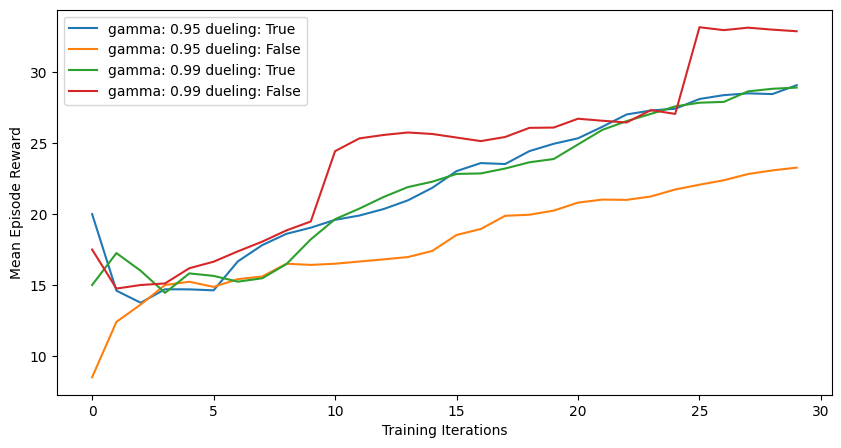

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for key, df in dataframes.items():
    plt.plot(df['episode_reward_mean'],
             label=f'gamma: {configs[key]["gamma"]} dueling: {configs[key]["dueling"]}')

plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Mean Episode Reward')
plt.show()